In [1]:
import pymysql
import pandas as pd

In [2]:
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "W5bj@289anju",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [3]:
queries = {
    "question1: " :
        """WITH mobile_sales AS (
                SELECT
                    skudet.sku_name,          -- Product name
                    skudet.category,          -- Product category
                    SUM(ordet.qty_ordered) AS total_quantity_sold  -- Total quantity sold per product
                FROM
                    order_detail AS ordet
                JOIN
                    sku_detail AS skudet
                    ON ordet.sku_id = skudet.id  -- Join to link order with product
                WHERE
                    skudet.category = 'Mobiles & Tablets'  -- Only mobile and tablet products
                    AND ordet.is_valid = 1                -- Only valid orders
                    AND YEAR(ordet.order_date) = 2022     -- Orders placed in 2022
                GROUP BY
                    skudet.sku_name,
                    skudet.category
            )
            
            SELECT *
            FROM mobile_sales
            ORDER BY total_quantity_sold DESC
            LIMIT 5;
    """,
    "question2: " :
    """
        WITH sales_2021 AS (
            SELECT
                sk.sku_name,
                SUM(od.qty_ordered) AS total_2021
            FROM
                order_detail od
            JOIN
                sku_detail sk ON od.sku_id = sk.id
            WHERE
                od.is_valid = 1
                AND YEAR(od.order_date) = 2021
            GROUP BY sk.sku_name
        ),
        
        -- CTE: 2022 sales by sku_name
        sales_2022 AS (
            SELECT
                sk.sku_name,
                SUM(od.qty_ordered) AS total_2022
            FROM
                order_detail od
            JOIN
                sku_detail sk ON od.sku_id = sk.id
            WHERE
                od.is_valid = 1
                AND YEAR(od.order_date) = 2022
            GROUP BY sk.sku_name
        ),
        
        -- LEFT JOIN: sales_2021 to sales_2022
        left_joined AS (
            SELECT
                s21.sku_name,
                s21.total_2021,
                COALESCE(s22.total_2022, 0) AS total_2022
            FROM sales_2021 s21
            LEFT JOIN sales_2022 s22 ON s21.sku_name = s22.sku_name
        ),

        -- RIGHT JOIN simulation: sales_2022 to sales_2021
        right_joined AS (
            SELECT
                s22.sku_name,
                COALESCE(s21.total_2021, 0) AS total_2021,
                s22.total_2022
            FROM sales_2022 s22
            LEFT JOIN sales_2021 s21 ON s22.sku_name = s21.sku_name
            WHERE s21.sku_name IS NULL
        ),
        
        -- Combine both sides (simulate FULL OUTER JOIN)
        combined_sales AS (
            SELECT * FROM left_joined
            UNION ALL
            SELECT * FROM right_joined
        )
        
        -- Final output: top 10 products with largest sales decrease
        SELECT
            sku_name,
            total_2021,
            total_2022,
            (total_2021 - total_2022) AS difference
        FROM combined_sales
        WHERE (total_2021 - total_2022) > 0
        ORDER BY difference DESC
        LIMIT 10;



    """,
    "question3: ":
    """
        SELECT
            CASE
                WHEN discount_amount = 0 THEN 'No Discount'
                WHEN discount_amount < 10 THEN 'Low Discount'
                WHEN discount_amount BETWEEN 10 AND 20 THEN 'Medium Discount'
                WHEN discount_amount > 20 THEN 'High Discount'
                ELSE 'Unknown'
            END AS discount_category,
            SUM(before_discount) AS total_sales
        FROM
            order_detail
        WHERE
            is_valid = 1
        GROUP BY
            discount_category
        ORDER BY
            FIELD(discount_category, 'No Discount', 'Low Discount', 'Medium Discount', 'High Discount');


    """,
    "question4: " :
    """
        WITH customer_orders_2022 AS (
            SELECT
                customer_id,
                COUNT(*) AS purchase_count
            FROM
                order_detail
            WHERE
                is_valid = 1
                AND YEAR(order_date) = 2022
            GROUP BY
                customer_id
        ),
        
        customer_summary AS (
            SELECT
                SUM(CASE WHEN purchase_count = 1 THEN 1 ELSE 0 END) AS one_time_customers,
                SUM(CASE WHEN purchase_count > 1 THEN 1 ELSE 0 END) AS repeat_customers
            FROM
                customer_orders_2022
        )
        
        SELECT
            one_time_customers,
            repeat_customers,
            CONCAT(ROUND(repeat_customers * 100.0 / (one_time_customers + repeat_customers), 2), '%') AS repeat_customer_ratio
        FROM
            customer_summary;


    """
}

In [4]:
from IPython.display import display

In [5]:
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")
    
    # Execute each query and display results
    for question, query in queries.items():
        print(f"\n--- {question} ---")
        df = pd.read_sql(query, connection)
        display(df)  # Display the DataFrame in the notebook
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!

--- question1:  ---


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24904\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,sku_name,category,total_quantity_sold
0,IDROID_BALRX7-Gold,Mobiles & Tablets,1000.0
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,31.0
2,Infinix Hot 4-Gold,Mobiles & Tablets,15.0
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,11.0
4,samsung_Grand Prime Plus-Silver,Mobiles & Tablets,10.0



--- question2:  ---


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24904\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,sku_name,total_2021,total_2022,difference
0,RB_Dettol Germ Busting Kit-bf,200.0,40.0,160.0
1,RS_Plain Rusk,160.0,0.0,160.0
2,RB_Household Bundle,113.0,0.0,113.0
3,RS_Baklawa 500gm,107.0,18.0,89.0
4,RS_Honey Dry Fruit Halwa,52.0,0.0,52.0
5,CA_shirt-Small,50.0,0.0,50.0
6,RS_Soan Papri-250gm,51.0,7.0,44.0
7,jn_900g,52.0,10.0,42.0
8,Mardaz_MDZ-P-18-M,34.0,0.0,34.0
9,Topline_Waheed Murad His Life and Our Times,41.0,10.0,31.0



--- question3:  ---


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24904\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,discount_category,total_sales
0,No Discount,3.527375e+09
1,High Discount,1.123983e+08



--- question4:  ---


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24904\4170545264.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,one_time_customers,repeat_customers,repeat_customer_ratio
0,1471.0,200.0,11.97%


Database connection closed.


In [6]:
import os

In [7]:
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "W5bj@289anju",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [9]:
output_folder = os.path.join(os.getcwd(), "dataset")

# Option 2: Use a specific folder in your Documents folder
# output_folder = os.path.join(os.path.expanduser("~"), "Documents", "dataset")

# Create folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

print(f"Directory created at: {output_folder}")

Directory created at: C:\Users\Rizpah\dataset


In [10]:
# List of tables to export
tables = ["order_detail", "sku_detail", "payment_detail","customer_detail"]  # Add your table names here

In [11]:
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # SQL query to fetch all data from the table
        query = f"SELECT * FROM {table};"
        
        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!
Exporting table: order_detail


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24904\1590211234.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table order_detail exported successfully to C:\Users\Rizpah\dataset\order_detail.csv.
Exporting table: sku_detail
Table sku_detail exported successfully to C:\Users\Rizpah\dataset\sku_detail.csv.
Exporting table: payment_detail
Table payment_detail exported successfully to C:\Users\Rizpah\dataset\payment_detail.csv.
Exporting table: customer_detail
Table customer_detail exported successfully to C:\Users\Rizpah\dataset\customer_detail.csv.
Database connection closed.


In [19]:
import pandas as pd
import os

# Option 1: Specify the full path to your CSV files
# Replace these paths with the actual locations of your files
file_path = r"C:\Users\Rizpah\dataset"  # Added 'r' prefix to treat as raw string
# Alternative solutions:
# file_path = "C:\\Users\\Rizpah\\dataset"  # Double backslashes
# file_path = "C:/Users/Rizpah/dataset"     # Forward slashes

df_od = pd.read_csv(os.path.join(file_path, "order_detail.csv"))
df_sd = pd.read_csv(os.path.join(file_path, "sku_detail.csv"))
df_pd = pd.read_csv(os.path.join(file_path, "payment_detail.csv"))
df_cd = pd.read_csv(os.path.join(file_path, "customer_detail.csv"))

# Option 2: If you're not sure where your files are, you can check your current working directory
#print("Current working directory:", os.getcwd())

# Option 3: List files in the current directory to verify if the CSV files exist
#print("Files in current directory:", os.listdir())

In [20]:
# Merge the dataframes
# Before merge we need to rename column in order to avoid duplicate column value
# So the key column will be excluded when joined
df_sd.rename(columns={'id':'sku_id'}, inplace=True)
df_cd.rename(columns={'id':'customer_id'}, inplace=True)
df_pd.rename(columns={'id':'payment_id'}, inplace=True)

In [21]:
# Merge the dataframes using left join
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how='left', on='sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how='left', on='customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how='left', on='payment_id')
                  )

In [22]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5764 non-null   object 
 1   customer_id      5764 non-null   object 
 2   order_date       5764 non-null   object 
 3   sku_id           5764 non-null   object 
 4   price            5764 non-null   int64  
 5   qty_ordered      5764 non-null   int64  
 6   before_discount  5764 non-null   float64
 7   discount_amount  5764 non-null   float64
 8   after_discount   5764 non-null   float64
 9   is_gross         5764 non-null   int64  
 10  is_valid         5764 non-null   int64  
 11  is_net           5764 non-null   int64  
 12  payment_id       5764 non-null   int64  
 13  sku_name         5764 non-null   object 
 14  base_price       5764 non-null   float64
 15  cogs             5764 non-null   float64
 16  category         5764 non-null   object 
 17  registered_dat

In [23]:
print(df_pd.columns)

Index(['payment_id', 'payment_method'], dtype='object')


In [24]:
print(df_od.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [25]:
# Ensure both columns have the same data type before merging
df_pd['payment_id'] = df_pd['payment_id'].astype(str)  # Convert to string
df_od['id'] = df_od['id'].astype(str)                  # Convert to string

# Merge order_detail with payment_detail without renaming columns
df_sample = pd.merge(df_pd, df_od, how='left', left_on='payment_id', right_on='id')

# Display info about the resulting DataFrame
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     16 non-null     object 
 1   payment_method   16 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 2.0+ KB


In [26]:
# change columns to datetime format using for loop
# use pandas.to_datetime to convert
for x in ['order_date', 'registered_date']:
  df[x] = pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               5764 non-null   object        
 1   customer_id      5764 non-null   object        
 2   order_date       5764 non-null   datetime64[ns]
 3   sku_id           5764 non-null   object        
 4   price            5764 non-null   int64         
 5   qty_ordered      5764 non-null   int64         
 6   before_discount  5764 non-null   float64       
 7   discount_amount  5764 non-null   float64       
 8   after_discount   5764 non-null   float64       
 9   is_gross         5764 non-null   int64         
 10  is_valid         5764 non-null   int64         
 11  is_net           5764 non-null   int64         
 12  payment_id       5764 non-null   int64         
 13  sku_name         5764 non-null   object        
 14  base_price       5764 non-null   float64

File successfully saved to C:\Users\Rizpah\OneDrive\Desktop\top5_mobiles_tablets.csv


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24608\1197288892.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


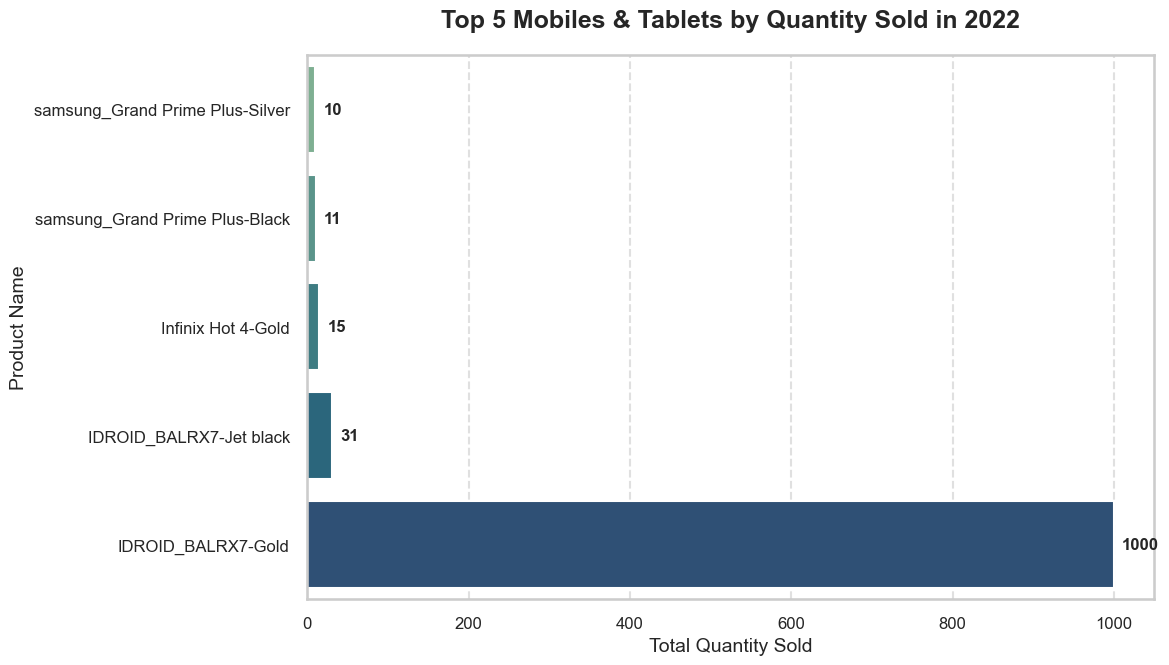

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data provided
data = {
    "sku_name": [
        "IDROID_BALRX7-Gold",
        "IDROID_BALRX7-Jet black",
        "Infinix Hot 4-Gold",
        "samsung_Grand Prime Plus-Black",
        "samsung_Grand Prime Plus-Silver"
    ],
    "category": [
        "Mobiles & Tablets",
        "Mobiles & Tablets",
        "Mobiles & Tablets",
        "Mobiles & Tablets",
        "Mobiles & Tablets"
    ],
    "total_quantity_sold": [1000.0, 31.0, 15.0, 11.0, 10.0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort for horizontal layout (smallest to largest for cleaner plot)
df = df.sort_values(by="total_quantity_sold", ascending=True)

# ---- Save to CSV ----
file_path = r"C:\Users\Rizpah\OneDrive\Desktop\top5_mobiles_tablets.csv"
df.to_csv(file_path, index=False)
print(f"File successfully saved to {file_path}")

# ---- Your plot ----
# Set visual style
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(12, 7))  # Adjust chart size

# Create horizontal bar chart
barplot = sns.barplot(
    data=df,
    x="total_quantity_sold",
    y="sku_name",
    palette="crest"
)

# Add labels to bars
for i in range(len(df)):
    barplot.text(
        df.total_quantity_sold.iloc[i] + max(df.total_quantity_sold) * 0.01,
        i,
        f"{df.total_quantity_sold.iloc[i]:.0f}",  # Round to integer
        va='center',
        fontweight='bold',
        fontsize=12
    )

# Customize chart
plt.title("Top 5 Mobiles & Tablets by Quantity Sold in 2022", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Total Quantity Sold", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


File successfully saved to C:\Users\Rizpah\OneDrive\Desktop\sku_sales_difference.csv


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24608\2381565341.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24608\2381565341.py:67: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Rizpah\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


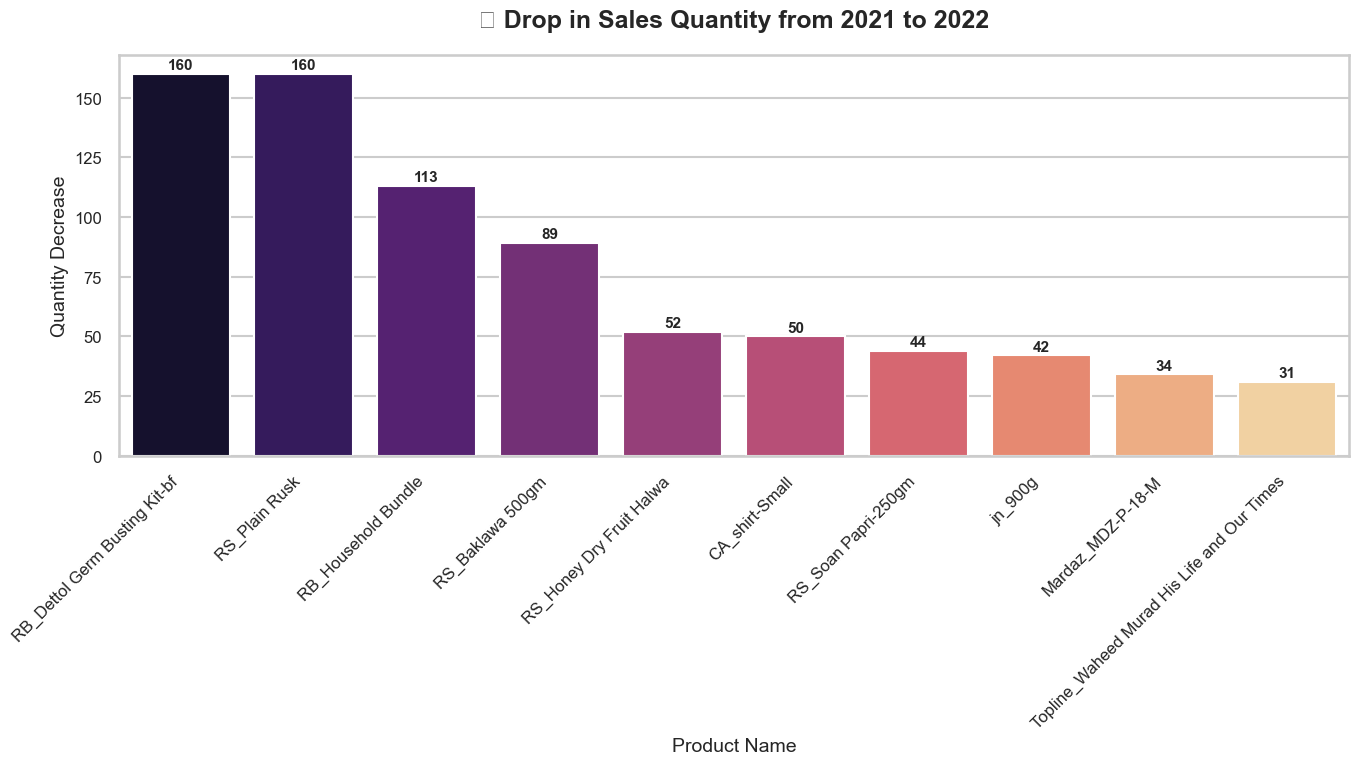

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your provided data
data = {
    "sku_name": [
        "RB_Dettol Germ Busting Kit-bf",
        "RS_Plain Rusk",
        "RB_Household Bundle",
        "RS_Baklawa 500gm",
        "RS_Honey Dry Fruit Halwa",
        "CA_shirt-Small",
        "RS_Soan Papri-250gm",
        "jn_900g",
        "Mardaz_MDZ-P-18-M",
        "Topline_Waheed Murad His Life and Our Times"
    ],
    "total_2021": [200, 160, 113, 107, 52, 50, 51, 52, 34, 41],
    "total_2022": [40, 0, 0, 18, 0, 0, 7, 10, 0, 10],
    "difference": [160, 160, 113, 89, 52, 50, 44, 42, 34, 31]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort for better presentation (optional)
df = df.sort_values(by="difference", ascending=False)

# ---- Save to CSV ----
file_path = r"C:\Users\Rizpah\OneDrive\Desktop\sku_sales_difference.csv"
df.to_csv(file_path, index=False)
print(f"File successfully saved to {file_path}")

# ---- Your plot ----
# Set plot style
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(14, 8))

# Create vertical bar chart
barplot = sns.barplot(
    data=df,
    x="sku_name",
    y="difference",
    palette="magma"
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of bars
for i in range(len(df)):
    barplot.text(
        i,
        df["difference"].iloc[i] + 2,  # small padding above bar
        f"{df['difference'].iloc[i]}",
        ha='center',
        fontweight='bold',
        fontsize=11
    )

# Add labels and title
plt.title("📉 Drop in Sales Quantity from 2021 to 2022", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Product Name", fontsize=14)
plt.ylabel("Quantity Decrease", fontsize=14)
plt.tight_layout()

# Show the chart
plt.show()


File successfully saved to C:\Users\Rizpah\OneDrive\Desktop\discount_sales.csv


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24608\1615960788.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


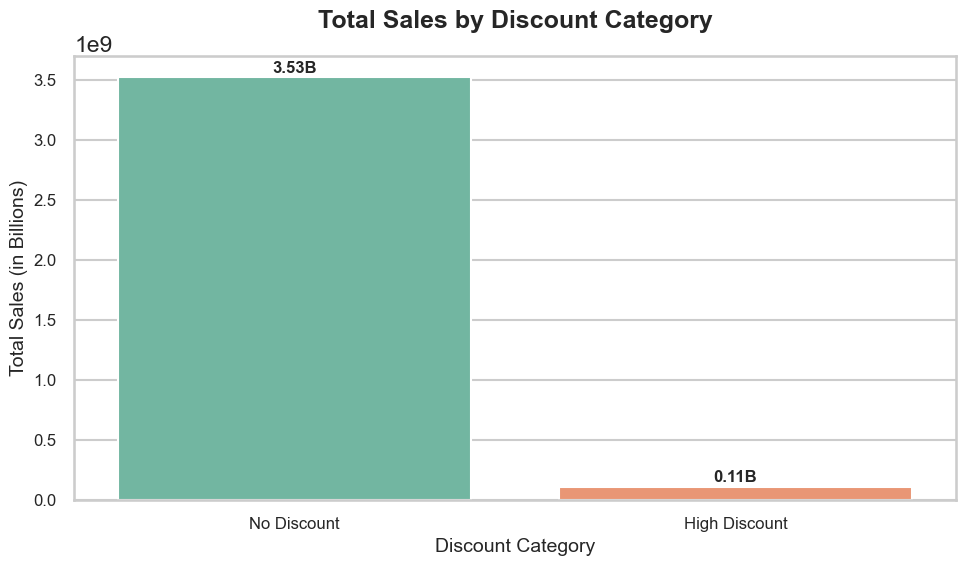

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your data
data = {
    "discount_category": ["No Discount", "High Discount"],
    "total_sales": [3.527375e+09, 1.123983e+08]
}

# Create DataFrame
df = pd.DataFrame(data)

# ---- Save DataFrame to CSV ----
file_path = r"C:\Users\Rizpah\OneDrive\Desktop\discount_sales.csv"
df.to_csv(file_path, index=False)
print(f"File successfully saved to {file_path}")

# ---- Your plot ----
# Set plot style
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

# Plot bar chart
barplot = sns.barplot(
    data=df,
    x="discount_category",
    y="total_sales",
    palette="Set2"
)

# Add labels on top of bars
for i in range(len(df)):
    barplot.text(
        i,
        df["total_sales"].iloc[i] + df["total_sales"].max() * 0.01,
        f"{df['total_sales'].iloc[i]/1e9:.2f}B",  # Format as billions
        ha='center',
        fontweight='bold',
        fontsize=12
    )

# Add titles and labels
plt.title("Total Sales by Discount Category", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Discount Category", fontsize=14)
plt.ylabel("Total Sales (in Billions)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


File successfully saved to C:\Users\Rizpah\OneDrive\Desktop\customer_scorecard.csv


C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24608\2605045851.py:43: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24608\2605045851.py:43: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rizpah\AppData\Local\Temp\ipykernel_24608\2605045851.py:43: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rizpah\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rizpah\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

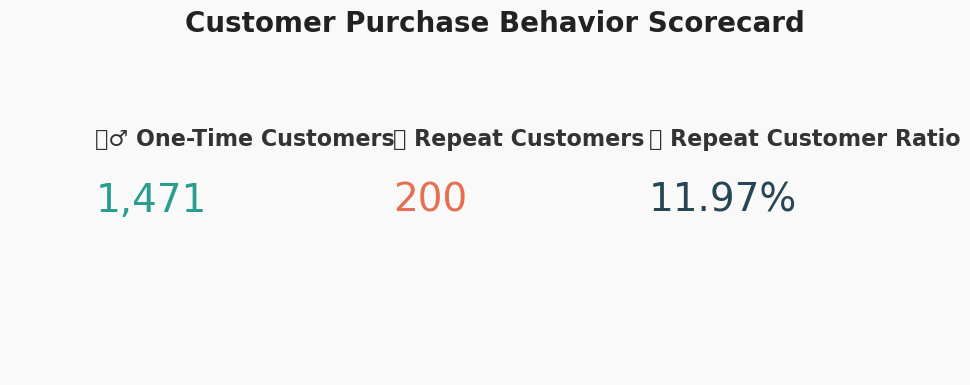

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "one_time_customers": 1471,
    "repeat_customers": 200,
    "repeat_customer_ratio": "11.97%"
}

# Convert to DataFrame (make it a row)
df = pd.DataFrame([data])  # list of dicts = one row

# Specify file path
file_path = r"C:\Users\Rizpah\OneDrive\Desktop\customer_scorecard.csv"

# Save to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

# ---- Your existing plot ----

# Plot setup
fig, ax = plt.subplots(figsize=(10, 4))
fig.patch.set_facecolor('#f9f9f9')
ax.axis('off')  # Hide axes

# Add text for scorecard
plt.text(0.1, 0.7, "🧍‍♂️ One-Time Customers", fontsize=16, weight='bold', color="#333")
plt.text(0.1, 0.5, f"{data['one_time_customers']:,}", fontsize=28, color="#2a9d8f")

plt.text(0.45, 0.7, "🔁 Repeat Customers", fontsize=16, weight='bold', color="#333")
plt.text(0.45, 0.5, f"{data['repeat_customers']:,}", fontsize=28, color="#e76f51")

plt.text(0.75, 0.7, "📈 Repeat Customer Ratio", fontsize=16, weight='bold', color="#333")
plt.text(0.75, 0.5, data['repeat_customer_ratio'], fontsize=28, color="#264653")

# Title
plt.suptitle("Customer Purchase Behavior Scorecard", fontsize=20, weight='bold', color="#222", y=0.95)

# Display
plt.tight_layout()
plt.show()
